In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

In [2]:
pd.set_option('max_rows', 20)

plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 3)
plt.rcParams['font.family'] = 'sans-serif'

In [3]:
# 建立 DataFrame 內容
df = pd.DataFrame({"age":[20, 40, np.nan, 19, 34], 
                   "gender":['男', '男', '女', '女', '女'], 
                   "height":[175, 168, 155, 160, 172]})

df


,age,gender,height
0,20.0,男,175
1,40.0,男,168
2,NaN,女,155
3,19.0,女,160
4,34.0,女,172


In [4]:
# 建立 Series object
s = pd.Series([20, 40, np.nan, 19, 34])

s

0    20.0
1    40.0
2     NaN
3    19.0
4    34.0
dtype: float64

# 第 8 章：資料輸入、輸出 (I/O)

## CSV 檔案 = 逗號分隔值 (Comma-separated values)

CSV 的全名為「逗號分隔值 (Comma-separated values)」。CSV 檔案泛指具有以下特徵的任何檔案：

1. 純文字
1. 由記錄（rows）組成
1. 每條記錄（row）被 **分隔符號** 分隔為欄位（columns）（典型分隔符號有逗號、分號）
1. 每條記錄都有同樣的欄位序列。若將一份 CSV 檔以文字編輯器（windows 的筆記本）開啟，則會顯示如下：

```
age,height,gender
20.0,175,男
40.0,168,男
,155,女
19.0,160,女
34.0,172,女
```

* 參考文件：
    * [Wikipedia | Comma-separated values](https://en.wikipedia.org/wiki/Comma-separated_values)
    * [Wikipedia | 逗號分隔值](https://zh.wikipedia.org/zh-tw/逗號分隔值)

## `.read.csv()`：讀取 CSV 檔案

此為 Pandas function 提供讀取 excel 檔案的 function。

* 常用 Parameters：
    * `parse_dates`：指定要被解析為 `datetime` 物件的 column
    * `index_col`：指定 index (row labels) 的 column
    * `na_values`：指定要被轉換為遺漏值 `NaN` 的數值
* 參考文件：
    * [pandas.read_csv](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html)
    * [IO Tools (Text, CSV, HDF5, …)](https://pandas.pydata.org/pandas-docs/stable/io.html)

In [5]:
# 設定檔案路徑
AQI_FILEPATH = os.path.join(os.curdir, 'data', 'aqi.csv')

# 讀取檔案
aqi = pd.read_csv(filepath_or_buffer=AQI_FILEPATH, parse_dates=['datetime'], index_col='datetime', na_values='NR')
aqi_bak = df.copy()

# 預覽資料內容
aqi.head()

,AMB_TEMP,CH4,CO,NMHC,NO,NO2,NOx,O3,PM10,PM2.5,RAINFALL,RH,SO2,THC,WD_HR,WIND_DIREC,WIND_SPEED,WS_HR
datetime,,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,20.0,2.0,0.20,0.04,1.7,7.5,9.2,25.0,67.0,18.0,NaN,88.0,1.5,2.0,33.0,37.0,1.4,0.1
2017-01-01 01:00:00,20.0,2.2,0.19,0.05,1.9,7.9,9.8,18.0,52.0,14.0,NaN,88.0,2.1,2.2,76.0,143.0,0.5,0.6
2017-01-01 02:00:00,19.0,2.2,0.24,0.08,2.0,9.3,11.0,13.0,59.0,17.0,NaN,89.0,2.0,2.3,140.0,142.0,0.5,0.6
2017-01-01 03:00:00,19.0,2.4,0.24,0.11,1.4,9.5,11.0,8.5,53.0,24.0,NaN,90.0,1.8,2.5,107.0,51.0,0.5,0.4
2017-01-01 04:00:00,18.0,3.4,0.23,0.12,6.8,11.0,17.0,1.8,37.0,25.0,NaN,90.0,1.7,3.6,96.0,106.0,1.0,0.5


## `.read_excel()`：讀取 Excel 試算表檔案

此為 Pandas function 提供讀取 excel 檔案的 function。

參考文件：[pandas.read_excel](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_excel.html#pandas.read_excel)

In [6]:
# 設定檔案路徑
AQI_EXCEL_FILEPATH = os.path.join(os.curdir, 'data', 'aqi.xlsx')

# 讀取檔案
aqi_excel = pd.read_excel(AQI_EXCEL_FILEPATH)

# 預覽資料內容
aqi_excel.head()

,datetime,AMB_TEMP,CH4,CO,NMHC,NO,NO2,NOx,O3,PM10,PM2.5,RAINFALL,RH,SO2,THC,WD_HR,WIND_DIREC,WIND_SPEED,WS_HR
0,2017-01-01 00:00:00,20.0,2.0,0.20,0.04,1.7,7.5,9.2,25.0,67.0,18.0,NR,88.0,1.5,2.0,33.0,37.0,1.4,0.1
1,2017-01-01 01:00:00,20.0,2.2,0.19,0.05,1.9,7.9,9.8,18.0,52.0,14.0,NR,88.0,2.1,2.2,76.0,143.0,0.5,0.6
2,2017-01-01 02:00:00,19.0,2.2,0.24,0.08,2.0,9.3,11.0,13.0,59.0,17.0,NR,89.0,2.0,2.3,140.0,142.0,0.5,0.6
3,2017-01-01 03:00:00,19.0,2.4,0.24,0.11,1.4,9.5,11.0,8.5,53.0,24.0,NR,90.0,1.8,2.5,107.0,51.0,0.5,0.4
4,2017-01-01 04:00:00,18.0,3.4,0.23,0.12,6.8,11.0,17.0,1.8,37.0,25.0,NR,90.0,1.7,3.6,96.0,106.0,1.0,0.5


## `.to_csv()`：將結果寫入 CSV 檔案內

將 Pandas Object （ DataFrame 和 Series ）輸出成 CSV 檔案。

* 常用 Parameters：
    1. `path_or_buf`：設定輸出檔案路徑
    1. `header`：設定是否保留 column index
        * `True`：輸出時保留 column index
        * `False`：輸出時不保留 column index
    1. `index`：設定是否保留 index (row labels)
        * `True`：輸出時保留 index
        * `False`：輸出時不保留 index
    1. `encoding`：設定編碼方式，預設編碼為 `utf-8`。詳情請參考 Python 官方文件：[7.2.3. Standard Encodings](https://docs.python.org/3/library/codecs.html#standard-encodings)
* 參考文件：
    * [pandas.DataFrame.to_csv](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_csv.html)
    * [pandas.Series.to_csv](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.to_csv.html)

In [7]:
# 設定存檔路徑
DF_CSV_SAVE_PATH = os.path.join(os.curdir, 'output', 'df_save_to_csvfile.csv')

# 輸出檔案
df.to_csv(path_or_buf=DF_CSV_SAVE_PATH, header=True, index=False)

## `.to_excel()`：將結果寫入 Excel 試算表檔案內

跟其他輸出的 function 不同，因為 Excel 試算表可以在同一個檔案中擁有許多工作表 (Sheet)，所以輸出第一個工作表時，可以先順手建立一個 `pandas.ExcelWriter` 物件，之後再把其他要輸出的資料寫入同樣的物件即可。

* 常用 Parameters：
    1. `excel_writer`：設定輸出檔案物件
        * `str`：輸出路徑位址
        * `ExcelWriter object`：`pandas.ExcelWriter` 物件
    1. `sheet_name`：試算表工作表名稱，預設為 `sheet1`
    1. `header`：設定是否保留 column index
        * `True`：輸出時保留 column index
        * `False`：輸出時不保留 column index
    1. `index`：設定是否保留 index (row labels)
        * `True`：輸出時保留 index
        * `False`：輸出時不保留 index
    1. `encoding`：設定編碼方式，預設編碼為 `utf-8`。詳情請參考 Python 官方文件：[7.2.3. Standard Encodings](https://docs.python.org/3/library/codecs.html#standard-encodings)
* 參考文件：[pandas.DataFrame.to_excel](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_excel.html)

In [8]:
# 先示範輸出一個僅包含一個工作表的 Excel 試算表
# 設定檔案儲存路徑
DF_EXCEL_SAVEPATH = os.path.join(os.curdir, 'output', 'df_save_to_excelfile.xlsx')

# 輸出檔案
df.to_excel(excel_writer=DF_EXCEL_SAVEPATH)

In [9]:
# 再示範輸出一個包含多個工作表的 Excel 試算表
DF_EXCEL_2SHEETS_SAVEPATH = os.path.join(os.curdir, 'output', 'df_save_to_excelfile_2sheets.xlsx')

# 先建立 ExcelWriter 物件
writer = pd.ExcelWriter(DF_EXCEL_2SHEETS_SAVEPATH)
# 再重複寫入同一個檔案到 Sheet2
df.to_excel(excel_writer=writer, sheet_name='Sheet1')
df.to_excel(excel_writer=writer, sheet_name='Sheet2', index=False)

In [10]:
writer.save()

## Plot I/O：將圖表儲存為圖片檔案

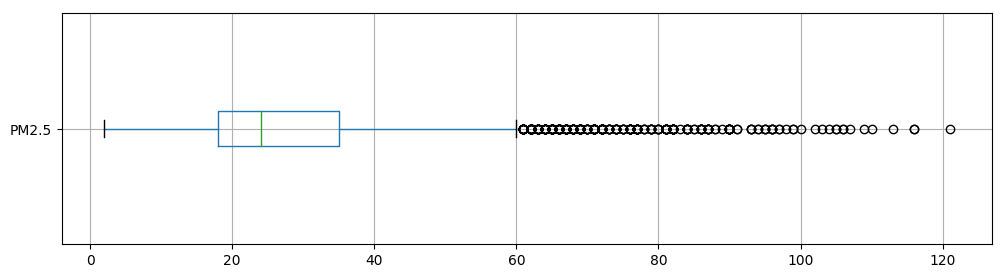

In [11]:
# 以 pandas.DataFrame.plot() 將畫出箱形圖，並存為物件 plot_object
plot_object = aqi[['PM2.5']].plot(kind='box', grid=True, vert=False)

# 儲存圖片到指定路徑
PLOT_SAVEPATH = os.path.join(os.curdir, 'output', 'pm25_counts.png')

# 取得 plot_object 中的圖案資訊
fig = plot_object.get_figure()

# 存檔
fig.savefig(PLOT_SAVEPATH)

In [12]:
# 檢查圖表物件的 type
type(plot_object)

matplotlib.axes._subplots.AxesSubplot